In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

In [5]:
data=sm.datasets.fair.load_pandas().data

In [8]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [15]:
##Creating the affair column in order to segregate the data between 0 and 1
data['affair']=(data.affairs>0).astype(int)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [17]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [18]:
##check datatypes and not null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int64
dtypes: float64(9), int64(1)
memory usage: 497.4 KB


In [20]:
data.groupby('rate_marriage').mean()

##as the age and yrs_married increases rate_marriage drops

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


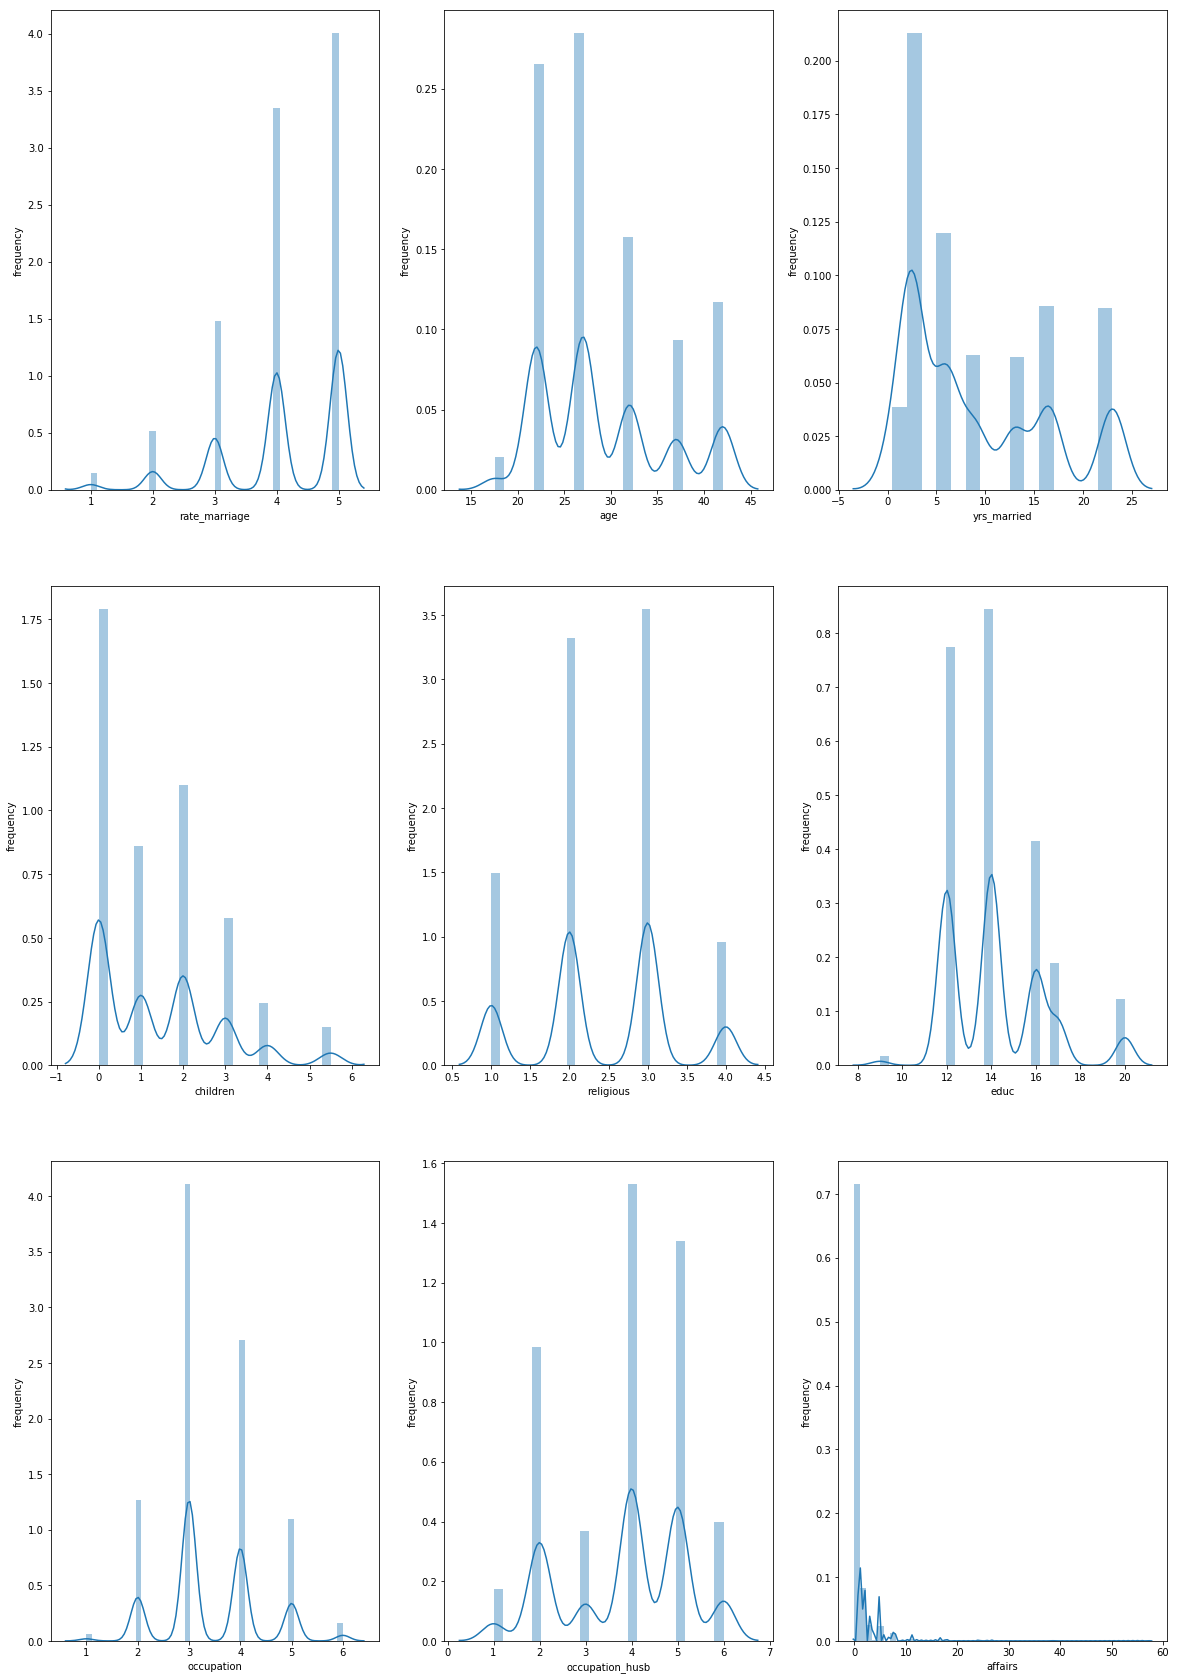

In [42]:
y=data['affair']
x=data.drop(columns=['affair'])
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column)
        plt.ylabel('frequency')
    plotnumber+=1
plt.show()

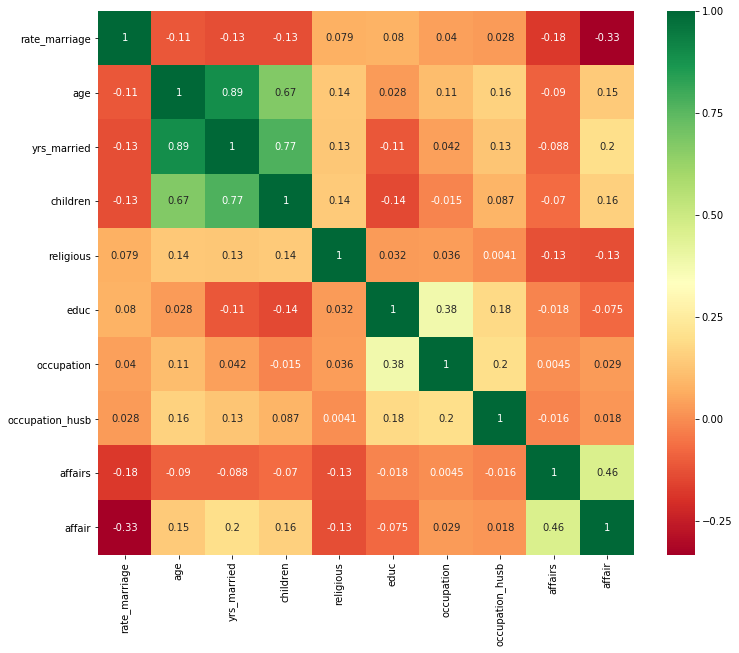

In [44]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [55]:
scaler=StandardScaler()
X=scaler.fit_transform(x)

vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,1.070420,rate_marriage
1,5.456286,age
2,7.145901,yrs_married
3,2.529103,children
4,1.046895,religious
5,1.296556,educ
6,1.207701,occupation
7,1.082883,occupation_husb
8,1.057968,affairs


In [105]:
'''
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  data, return_type="dataframe")
'''
y, X = dmatrices('affair ~ rate_marriage + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  data, return_type="dataframe")
#print(X.head())
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

# and flatten y into a 1-D array so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)
print(X.columns)


Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'children', 'religious', 'educ'],
      dtype='object')


In [112]:
##Dropping columns age,yrs_married as their is multicollinearity between them
#X=x.drop(columns=['yrs_married','age'])
scaler=StandardScaler()
X=scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=355)
model=LogisticRegression()
model.fit(x_train,y_train)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
prediction=model.predict(x_test)
probability=model.predict_proba(x_test)
print(prediction)
print(probability)

[1. 0. 0. ... 1. 0. 1.]
[[0.43669807 0.56330193]
 [0.63852771 0.36147229]
 [0.89339945 0.10660055]
 ...
 [0.34905937 0.65094063]
 [0.52383845 0.47616155]
 [0.4718972  0.5281028 ]]


In [114]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.7213500784929356

In [115]:
conf_mtrx=confusion_matrix(y_test,prediction)
conf_mtrx

array([[787,  76],
       [279, 132]])

In [116]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82       863
         1.0       0.63      0.32      0.43       411

   micro avg       0.72      0.72      0.72      1274
   macro avg       0.69      0.62      0.62      1274
weighted avg       0.70      0.72      0.69      1274



In [117]:
print(roc_auc_score(y_test, probability[:, 1]))

0.7167028951797751
